# Eksperimen data Census
 

Oleh : Bervianto Leo P - 13514047 dan Muhammad Reifiza - 13514103

## Fungsi _Plot Confusion Matrix_

Fungsi ini digunakan nanti, untuk memplot _confusion matrix_ dalam bentuk grafik.

Diambil dari http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Mempersiapkan data dari csv
Data census harus ada di dalam folder yang sama dengan _script_ ini dijalankan. 

In [2]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import pandas

namesCensus = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

census_train_raw = pandas.read_csv("CencusIncome.data.txt", index_col=False, header = 0, names=namesCensus)
census_train = pandas.DataFrame(census_train_raw)

census_test_raw = pandas.read_csv("CencusIncome.test.txt", index_col=False, header = 0, names=namesCensus)
census_test = pandas.DataFrame(census_test_raw)

## Preproses data
Karena nilai data semuanya dalam bentuk string, kalau langsung dimasukkan akan menyebabkan sklearn tree dan seaborn terbingung-bingung. Oleh karena itu, data mesti dipreproses dulu dengan meng-_encode_ nya nilai datanya menjadi float.

In [3]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for col in ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "class"]:
    census_train[col] = encoder.fit_transform(census_train[col])  
    census_test[col] = encoder.fit_transform(census_test[col])  

## Visualisasi data

Data divisualisasikan dengan menggunakan _library_ seaborn

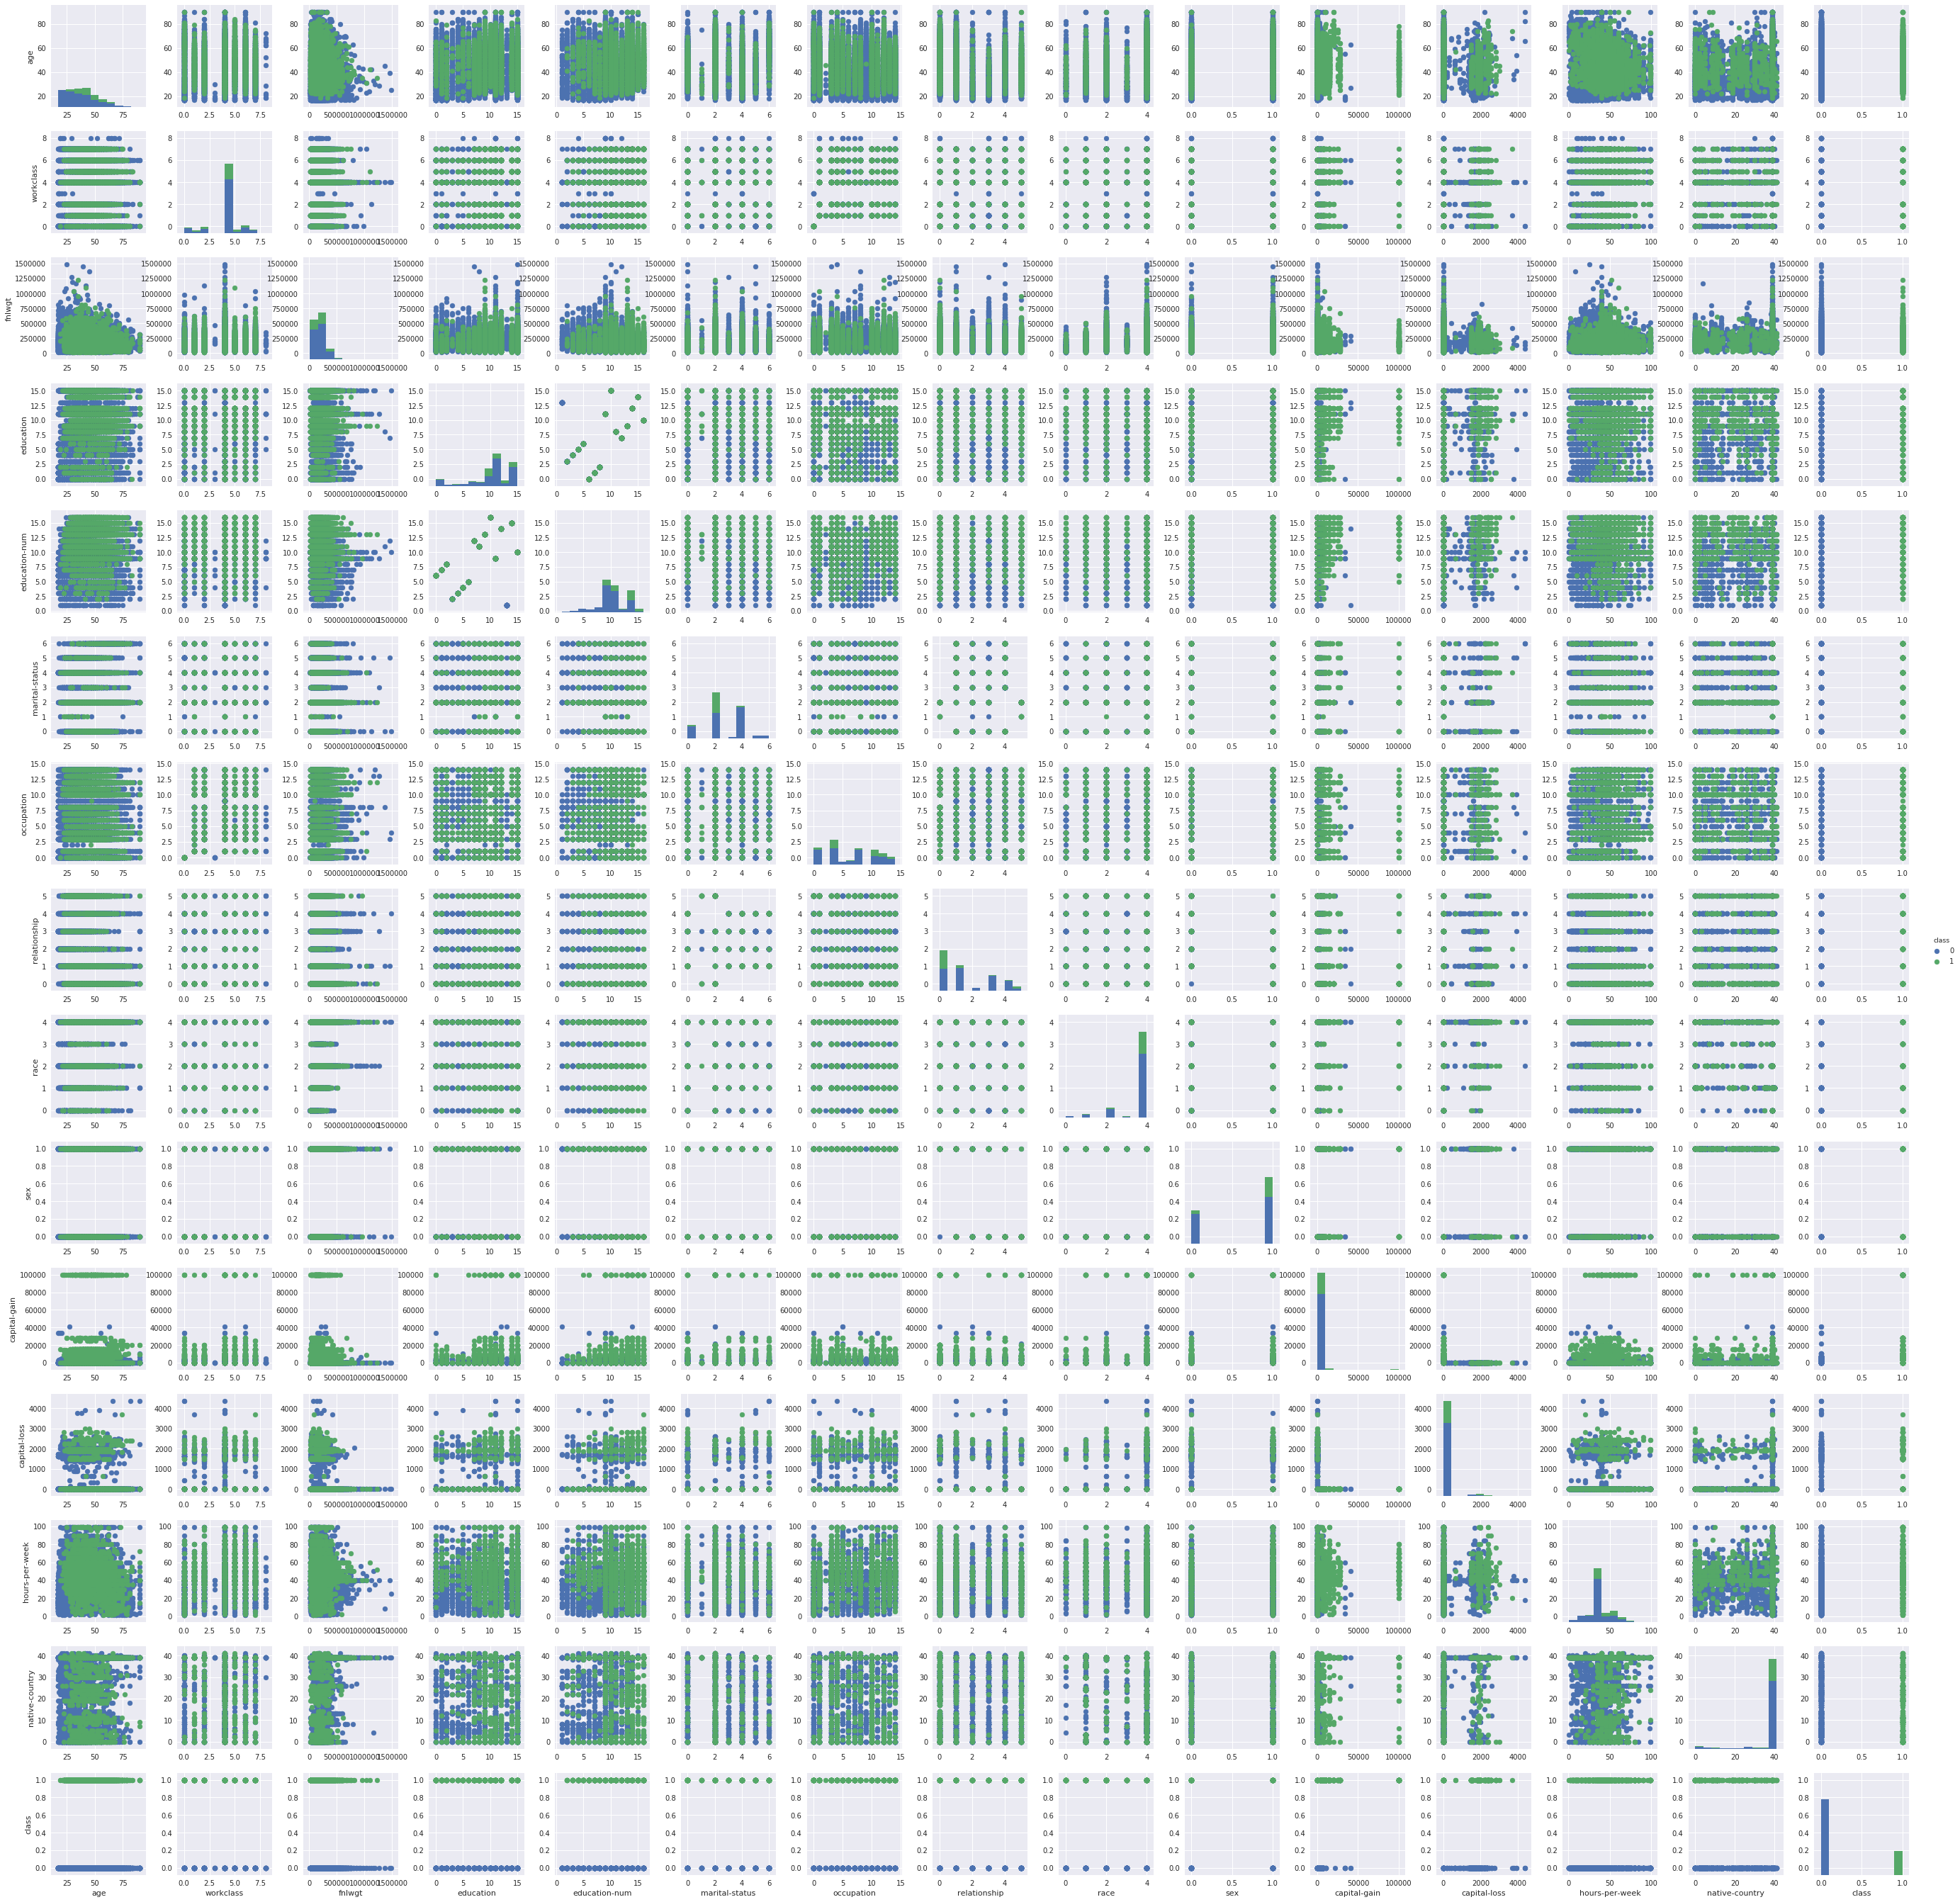

In [20]:
import seaborn
seaborn.set(color_codes=True)
g = seaborn.PairGrid(census_train, hue="class")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

## Membuat _Classifier Decision Tree dan ANN.

Skema _Full Training_.

In [4]:
census_train_train = census_train.drop("class", axis=1)
census_train_classes = census_train.iloc[:,-1]

census_test_data = census_test.drop("class", axis=1)
census_test_classes = census_test.iloc[:,-1]

## Model Terbaik 1

Ini adalah model terbaik 

In [5]:
#Tree params 1
myMaxDepth = 5

#ANN params 1
myAlpha = 1e-6
myhiddenLayer = (10,10)
myRandomState = 1 

myDTLCrossFold = 10
myANNCrossFold = 10

In [9]:
from sklearn import tree
dtl = tree.DecisionTreeClassifier(max_depth = myMaxDepth)
dtl.fit(census_train_train, census_train_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(alpha=myAlpha, hidden_layer_sizes=myhiddenLayer, random_state=myRandomState)
ann.fit(census_train_train, census_train_classes)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Ukuran Kinerja Model 1

Ukuran kinerja yang kami gunakan.

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtl, census_test_data, census_test_classes, cv=myDTLCrossFold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.01)


In [12]:
scores = cross_val_score(ann, census_test_data, census_test_classes, cv=myANNCrossFold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.03)


## Model Terbaik 2

In [13]:
#Tree params 1
myMaxDepth = 4

#ANN params 1
myAlpha = 1e-6
myhiddenLayer = (10,3)
myRandomState = 1 

myDTLCrossFold = 10
myANNCrossFold = 10

In [16]:
dtl = tree.DecisionTreeClassifier(max_depth = myMaxDepth)
dtl.fit(census_train_train, census_train_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
ann = MLPClassifier(alpha=myAlpha, hidden_layer_sizes=myhiddenLayer, random_state=myRandomState)
ann.fit(census_train_train, census_train_classes)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Ukuran Kinerja Model 2

Ukuran kinerja yang kami gunakan.

In [18]:
scores = cross_val_score(dtl, census_test_data, census_test_classes, cv=myDTLCrossFold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.01)


In [19]:
scores = cross_val_score(ann, census_test_data, census_test_classes, cv=myANNCrossFold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.00)


## Kesimpulan

Tidak ada penanganan khusus terhadap data. 

Skenario yang kami gunakan adalah mencoba membandingkan kinerja model menggunakan parameter yang diubah satu per satu dengan parameter yang ditemukan paling baik. Model yang paling pertama paling baik dianggap model dengan parameter default. Ketika kami mencoba sebuah parameter tidak berpengaruh, maka kami langsung mengabaikan parameter tersebut dan berganti dengan parameter lain.

2 Konfigurasi model terbaik dari hasil eksperimen bisa dilihat di atas.

Kami menemukan bahwa hasil kinerja model dtl konsisten, namun model ann kami tidak menemukan konsistensinya. Untuk dtl, model terbaik memiliki max depth yang lebih rendah daripada model terbaik kedua. Bisa dibilang untuk dtl, model terbaik lebih general daripada model terbaik kedua, namun untuk ann, model terbaik tidak lebih general daripada model terbaik kedua.